download data

In [1]:
import os
import csv
from urllib.request import urlretrieve
import numpy as np
import pandas as pd

In [2]:
data = '../data/'

In [3]:
if not os.path.exists(data):
    os.makedirs(data)
for target_dir in ('curated', 'raw'):
    if not os.path.exists(data + target_dir):
        os.makedirs(data + target_dir)

#### extra data

In [4]:
taxi_zone_url = 'https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv'
taxi_zone_dir = data + 'raw'

In [5]:
#Download NYC taxi zone
taxi_zone = f"{taxi_zone_dir}/taxi_zones.csv"
urlretrieve(taxi_zone_url, taxi_zone)

('../data/raw/taxi_zones.csv', <http.client.HTTPMessage at 0x7f2f583b8f40>)

In [6]:
extra_url = "https://raw.githubusercontent.com/nychealth/coronavirus-data/355635b35f482252d2527f141679a1264a4bc946/trends/data-by-day.csv"
extra_dir = data + 'raw'

In [7]:
# Download NYC daily COVID-19 case data by area
extra = f"{extra_dir}/data-by-day.csv"
urlretrieve(extra_url, extra)

('../data/raw/data-by-day.csv', <http.client.HTTPMessage at 0x7f2f490f4e80>)

In [8]:
#read data
pd.options.mode.chained_assignment = None
covid = pd.read_csv("/home/jingxiy1/mast30034-project-1-JingxiYuan/data/raw/data-by-day.csv")

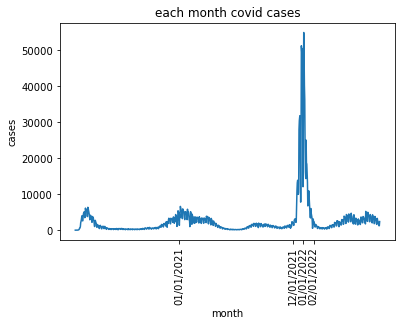

In [9]:
#show covid cases
import matplotlib.pyplot as plt
import numpy as np
plt.plot(covid.date_of_interest, covid.CASE_COUNT)
plt.xticks(('01/01/2021', '12/01/2021', '01/01/2022', '02/01/2022'),rotation = 90)
plt.title('each month covid cases')
plt.xlabel('month')
plt.ylabel("cases")
plt.savefig('/home/jingxiy1/mast30034-project-1-JingxiYuan/plots/each month covid cases.jpg', dpi = 200, bbox_inches = 'tight')
plt.show()

In [10]:
#Filter reserved columns
covid = covid[['date_of_interest', 'CASE_COUNT', 'BX_CASE_COUNT', 'BK_CASE_COUNT', 'MN_CASE_COUNT', 'QN_CASE_COUNT', 'SI_CASE_COUNT']]

In [11]:
covid.to_csv('../data/curated/covid.csv')

#### data

In [12]:
YEAR = '2022'
YEAR1 = '2021'
# adjust the range function to the numerical months i.e 1 = jan, 2 = feb, etc...
# MONTHS = range(1, 13)
MONTHS = range(1, 3)

In [13]:
# this is the URL template as of 07/2022
URL_TEMPLATE = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_"#year-month.parquet


In [14]:
# data output directory is `data/tlc_data/`
tlc_output_dir = data + 'raw/'

for month in MONTHS:
    # 0-fill i.e 1 -> 01, 2 -> 02, etc
    month = str(month).zfill(2) 
    print(f"Begin month {month}")
    
    # generate url
    url = f'{URL_TEMPLATE}{YEAR}-{month}.parquet'
    # generate output location and filename
    output_dir = f"{tlc_output_dir}/{YEAR}-{month}.parquet"
    # download
    urlretrieve(url, output_dir) 
    
    print(f"Completed month {month}")

month = str(12).zfill(2) 
print(f"Begin month {12}")
    
# generate url
url = f'{URL_TEMPLATE}{YEAR1}-{12}.parquet'
# generate output location and filename
output_dir = f"{tlc_output_dir}/{'2021'}-{12}.parquet"
# download
urlretrieve(url, output_dir) 
    
print(f"Completed month {12}")
# this code from tutorial 1

Begin month 01
Completed month 01
Begin month 02
Completed month 02
Begin month 12
Completed month 12


read data

In [15]:
df1 = pd.read_parquet('../data/raw/2021-12.parquet')
df2 = pd.read_parquet('../data/raw/2022-01.parquet')
df3 = pd.read_parquet('../data/raw/2022-02.parquet')

In [21]:
df = pd.concat([df1, df2, df3], axis = 0)
df.reindex

<bound method DataFrame.reindex of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2021-12-01 00:19:51   2021-12-01 00:37:01              1.0   
1               2  2021-12-01 00:29:07   2021-12-01 00:45:13              2.0   
2               1  2021-12-01 00:12:40   2021-12-01 00:27:17              0.0   
3               1  2021-12-01 00:10:18   2021-12-01 00:19:20              1.0   
4               1  2021-12-01 00:25:12   2021-12-01 00:39:07              1.0   
...           ...                  ...                   ...              ...   
2979426         2  2022-02-28 23:50:00   2022-03-01 00:06:00              NaN   
2979427         2  2022-02-28 23:06:57   2022-02-28 23:19:12              NaN   
2979428         2  2022-02-28 23:48:13   2022-03-01 00:03:33              NaN   
2979429         2  2022-02-28 23:56:41   2022-03-01 00:04:57              NaN   
2979430         2  2022-02-28 23:04:00   2022-02-28 23:10:00              

In [22]:
df.extra.describe()

count    8.657731e+06
mean     1.028693e+00
std      1.248923e+00
min     -4.500000e+00
25%      0.000000e+00
50%      5.000000e-01
75%      2.500000e+00
max      3.350000e+01
Name: extra, dtype: float64

select columns

In [23]:
#Since the amount of other additional fees is too small, this project believes that the driver's income is only about tips_a and fares
need_df = df[['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance','PULocationID','DOLocationID','payment_type','fare_amount','tip_amount']]

In [24]:
need_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount
0,2021-12-01 00:19:51,2021-12-01 00:37:01,9.30,138,141,1,26.5,7.60
1,2021-12-01 00:29:07,2021-12-01 00:45:13,2.76,238,42,2,13.0,0.00
2,2021-12-01 00:12:40,2021-12-01 00:27:17,3.40,239,74,1,13.5,2.00
3,2021-12-01 00:10:18,2021-12-01 00:19:20,1.30,148,87,1,6.5,2.05
4,2021-12-01 00:25:12,2021-12-01 00:39:07,3.10,231,246,1,12.5,2.50


In [25]:
need_df.to_parquet('../data/curated/yellow taxi.parquet', compression= 'gzip')